# <span style="color:black"> LSN-Esercitazione numerica 5</span>


## <span style="color:blue">  Esercizio 05.1</span>

Nella seguente esercitazione sono andato a campionare le distribuzioni di probabilità descritte dai moduli quadri delle due funzioni d'onda dell'atomo di idrogeno destritte dagli orbitali 1s e 2p:

$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$

Ho studiato i valori medi della posizione  $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$, confrontandoli con queli analitici:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

Ho sfruttato l'**algoritmo di Metropolis** per campionare  $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$  in coordinate cartesiane utilizzando una transizione di probabilità $T(\vec{x}|\vec{X'})$ uniforme e gaussiana multivariata. 

Ho implementato l'algoritmo di Metropolis proponendo una mossa in $x'$ generata secondo una distribuzione $T(x'|x)$ e accettandola con una probabilità
$$A(x'|x)=min\left\{1,\frac{T(x|x')p(x')}{T(x'|x)p(x)} \right\}=min\left\{1,\frac{p(x')}{p(x)} \right\},$$
dove l'ultima uguaglianza vale nel caso in cui $T(x'|x)$ sia una distribuzione simmetrica, ovvero che valga $T(x|x')=T(x'|x)$, come nel caso delle due tranzizioni di probabilità utilizzate.
Ho inserito le distribuzioni di probabilità descritte dei moduli quadri senza il termine di nornalizzazione, sfruttando il fatto che esse compiano solamente come rapporti.

Descrivo i risulati di $10^6$ steps suddivisi in 300 blocchi per il calcolo delle incertezze attraverso il Data-Blocking: tale scelta permette la scorrelazione dei dati all'interno del blocco e ha a disposizione un numero di blocchi adeguato per stimare la grandezza studiata. Ho scelto opportune dimesionsioni dei passi, a seconda della diversa transizione, per provare a rispettare la *regola empirica del 50%* del rapporto di accettazione, stampato a terminale.

**N:B: tutti i file di output sono stati compressi per le grandi dimensioni: se si vuole rilanciare il caricamento dei dati e la loro analisi occorre de-zippare i file nella cartella "Risultati".**

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

r, sum_prog, err_prog = np.loadtxt('Risultati/rmean_Uni_1s.res', usecols=(0,1,2), unpack='true')
X, Y, Z=np.loadtxt('Risultati/coordinates_Uni_1s.res', usecols=(1,2,3), unpack='true')

r2, sum_prog2, err_prog2 = np.loadtxt('Risultati/rmean_Uni_2p.res', usecols=(0,1,2), unpack='true')
X2, Y2, Z2=np.loadtxt('Risultati/coordinates_Uni_2p.res', usecols=(1,2,3), unpack='true')


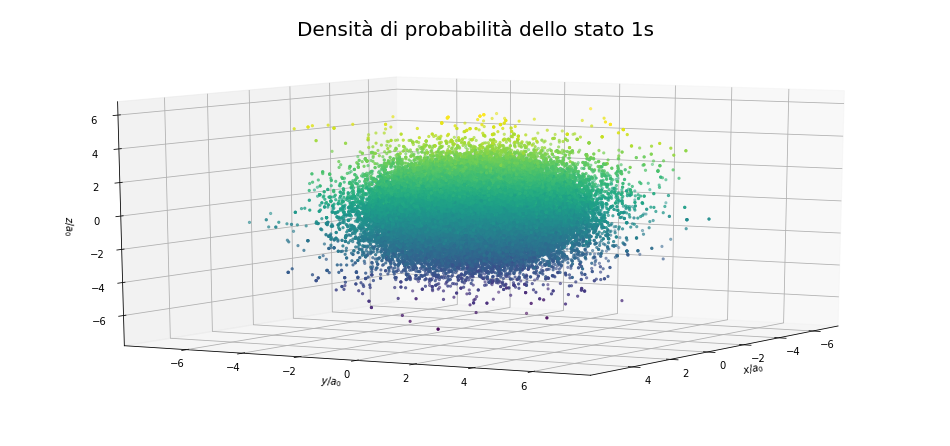

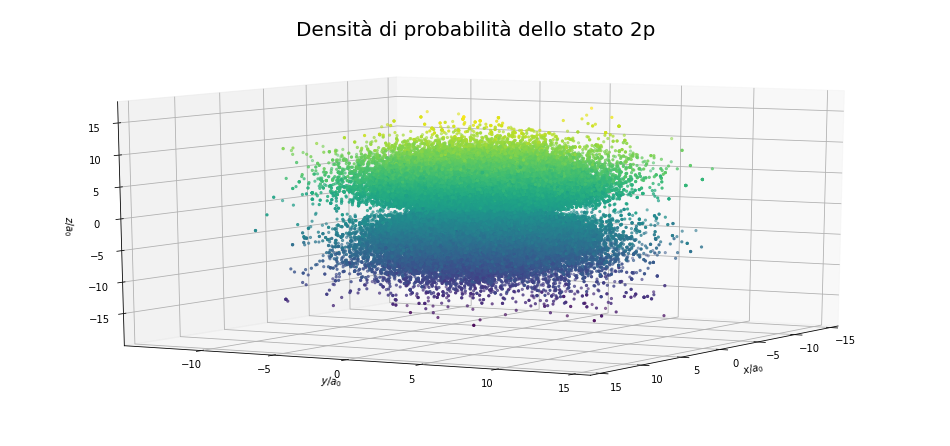

In [4]:
fig = plt.figure(figsize=(13,6))
ax = Axes3D(fig)
ax.scatter(X[700000:], Y[700000:], Z[700000:], c=Z[700000:], marker='.')
ax.set_xlabel(r'$x/a_0$', fontsize=10)
ax.set_ylabel(r'$y/a_0$', fontsize=10)
ax.set_zlabel(r'$z/a_0$', fontsize=10)
ax.view_init(10, 30)
plt.title('Densità di probabilità dello stato 1s', fontsize=20)
plt.show()

fig = plt.figure(figsize=(13,6))
ax = Axes3D(fig)
ax.scatter(X2[700000:], Y2[700000:], Z2[700000:], c=Z2[700000:], marker='.')
ax.set_xlabel(r'$x/a_0$', fontsize=10)
ax.set_ylabel(r'$y/a_0$', fontsize=10)
ax.set_zlabel(r'$z/a_0$', fontsize=10)
ax.view_init(10, 30)
plt.title('Densità di probabilità dello stato 2p', fontsize=20)
plt.show()

L'algoritmo di Metropolis campiona gli orbitali 1s e 2p riproducendo la distribuzione corretta.

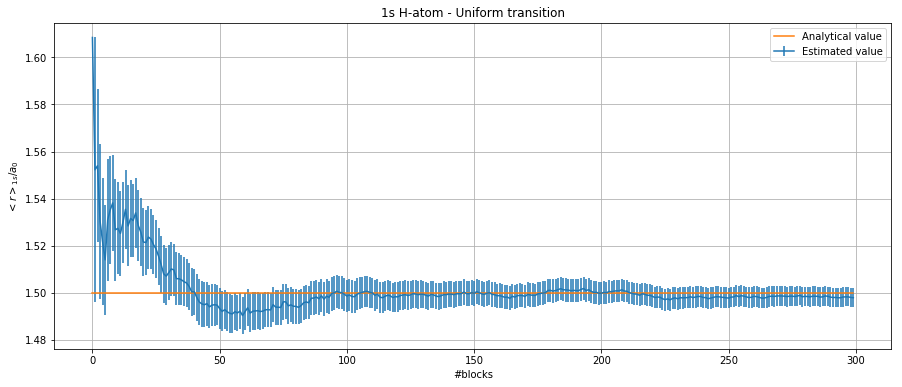

In [8]:
plt.figure(figsize=(15,6))
plt.errorbar(r,sum_prog,yerr=err_prog, label="Estimated value")
plt.plot(r, 1.5 +r-r, label="Analytical value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel(r'$<r>_{1s}/a_0$')
plt.title("1s H-atom - Uniform transition")
plt.grid(True)
plt.show()

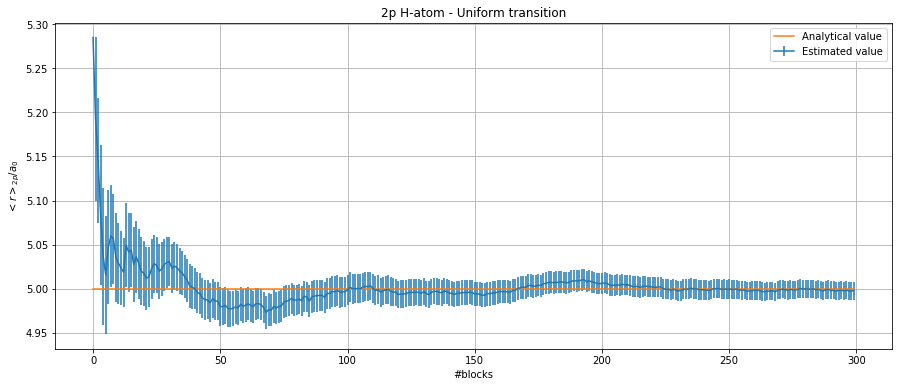

In [10]:
plt.figure(figsize=(15,6))
plt.errorbar(r2,sum_prog2,yerr=err_prog2, label="Estimated value")
plt.plot(r2, 5 +r2-r2, label="Analytical value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel(r'$<r>_{2p}/a_0$')
plt.title("2p H-atom - Uniform transition")
plt.grid(True)
plt.show()

Il valore analitico è, in entrambi i casi, al centro delle barre di errore mostrando la perfetta compatibilità statistica dei dati con il valore vero. 

Mostro, ora, $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ per una transizione gaussiana multivariata 

In [12]:
rg, sum_progg, err_progg = np.loadtxt('Risultati/rmean_Gauss_2p.res', usecols=(0,1,2), unpack='true')

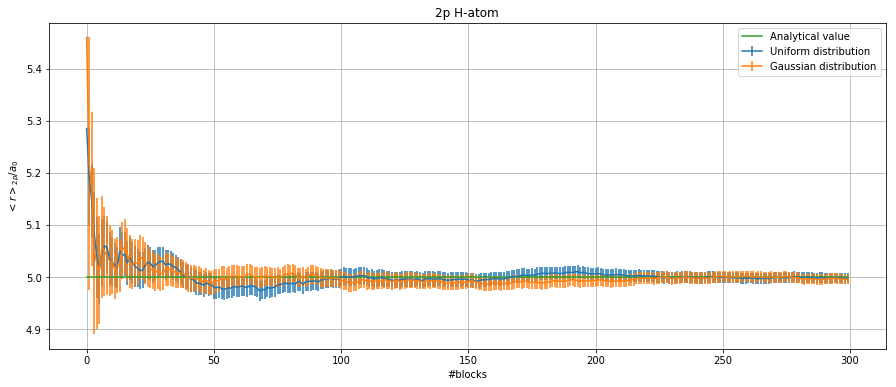

In [13]:
plt.figure(figsize=(15,6))
plt.errorbar(r2,sum_prog2,yerr=err_prog2, label="Uniform distribution")
plt.errorbar(rg,sum_progg,yerr=err_progg, label="Gaussian distribution")
plt.plot(r2, 5 +r2-r2, label="Analytical value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel(r'$<r>_{2p}/a_0$')
plt.title("2p H-atom")
plt.grid(True)
plt.show()

I due metodi sono, come atteso, statisticamente equivalenti.

Infine, descrivo i risulati per $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ per una simulazione con posizione iniziale lontana dalle zone di massimo della distribuzione: mentre per le simualzioni precedenti la posizione iniziale scelta era $(0.3, 0.3, 0.3)$, in questo caso si è scelta $(20, 20, 20)$.

In [14]:
rf, sum_progf, err_progf = np.loadtxt('Risultati/rmean_Uni_1s_far.res', usecols=(0,1,2), unpack='true')

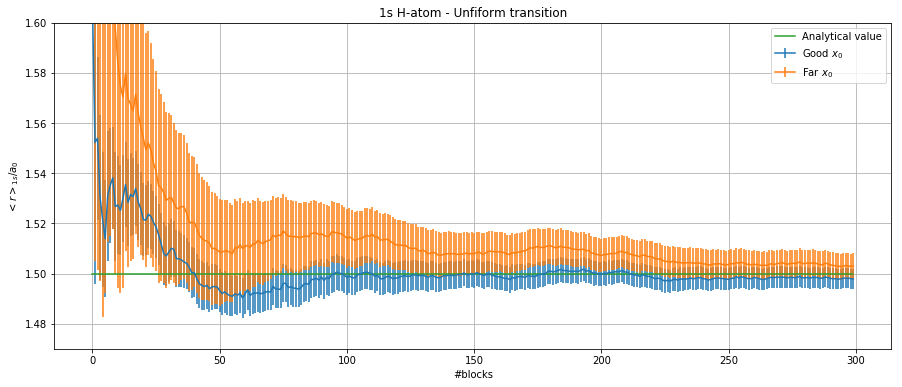

In [23]:
plt.figure(figsize=(15,6))
plt.errorbar(r,sum_prog,yerr=err_prog, label="Good $x_0$")
plt.errorbar(rf,sum_progf,yerr=err_progf, label="Far $x_0$")
plt.plot(rf, 1.5 +rf-rf, label="Analytical value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel(r'$<r>_{1s}/a_0$')
plt.title("1s H-atom - Unfiform transition")
plt.grid(True)
plt.ylim((1.47, 1.6)) 
plt.show()

Si osserva una prima fase di equilibrazione in cui il valor medio della posizione varia bruscamente: per un numero di blocchi sufficientemnete elevato, anche la la simulazione con posizione iniziale "lontana" inizia a campionare la distribuzione corretta.